In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F678-42D0

 Directory of C:\Users\Shiva\Documents\Data Science\Assignments

12/19/2022  05:48 PM    <DIR>          .
12/19/2022  01:59 PM    <DIR>          ..
12/19/2022  05:48 PM    <DIR>          .ipynb_checkpoints
12/19/2022  05:47 PM                72 Company Data Decision Tree Assignment.ipynb
12/19/2022  05:45 PM            17,023 Company_Data.csv
12/19/2022  05:46 PM           160,948 Fraud Check Assignment  Decision Tree.ipynb
12/19/2022  01:21 PM            21,837 Fraud_check.csv
12/19/2022  05:45 PM             1,377 problem statement(company data).txt
12/19/2022  01:21 PM               460 Problem_statement(Fraudcheck).txt
               6 File(s)        201,717 bytes
               3 Dir(s)  70,893,371,392 bytes free


# Problem Statement
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [12]:
data=pd.read_csv("Company_Data.csv")
print(data.sample(6))
print("Shape : ",data.shape)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
146   3.90        114      83            0         412    131       Bad   39   
198   3.62        112      80            5         500    128    Medium   69   
317   6.41        142      30            0         472    136      Good   80   
78    4.43        134      48            1         139    145    Medium   65   
110   9.00        128      62            7         125    116    Medium   43   
44    4.16         85      79            6         325     95    Medium   69   

     Education Urban   US  
146         14   Yes   No  
198         10   Yes  Yes  
317         15    No   No  
78          12   Yes  Yes  
110         14   Yes  Yes  
44          13   Yes  Yes  
Shape :  (400, 11)


In [13]:
print(data['Sales'].mean())

7.496325


In [14]:
Sale=[]
ShelveLoc1=[]
for i in range(0,len(data['Sales'])):
    if data.Sales[i]<data['Sales'].mean():
        Sale.append("Low")
    else:
        Sale.append("High")
data['Sale']=Sale
#===================================================================
#for i in data.ShelveLoc:
#    if i=="Medium":
#        ShelveLoc1.append(0)
#    elif i=="Bad":
#        ShelveLoc1.append(-1)
#    else:
#        ShelveLoc1.append(1)
#data['ShelveLoc']=ShelveLoc1
#===================================================================
encoder=LabelEncoder()
data['Urban']=encoder.fit_transform(data['Urban'])
data['ShelveLoc']=encoder.fit_transform(data['ShelveLoc'])
data['US']=encoder.fit_transform(data['US'])
#===================================================================
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [15]:
x=data.iloc[:,1:-1]
y=data.Sale

In [16]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
data['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [18]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
model=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [43]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

        High       0.68      0.70      0.69        71
         Low       0.64      0.62      0.63        61

    accuracy                           0.67       132
   macro avg       0.66      0.66      0.66       132
weighted avg       0.67      0.67      0.67       132



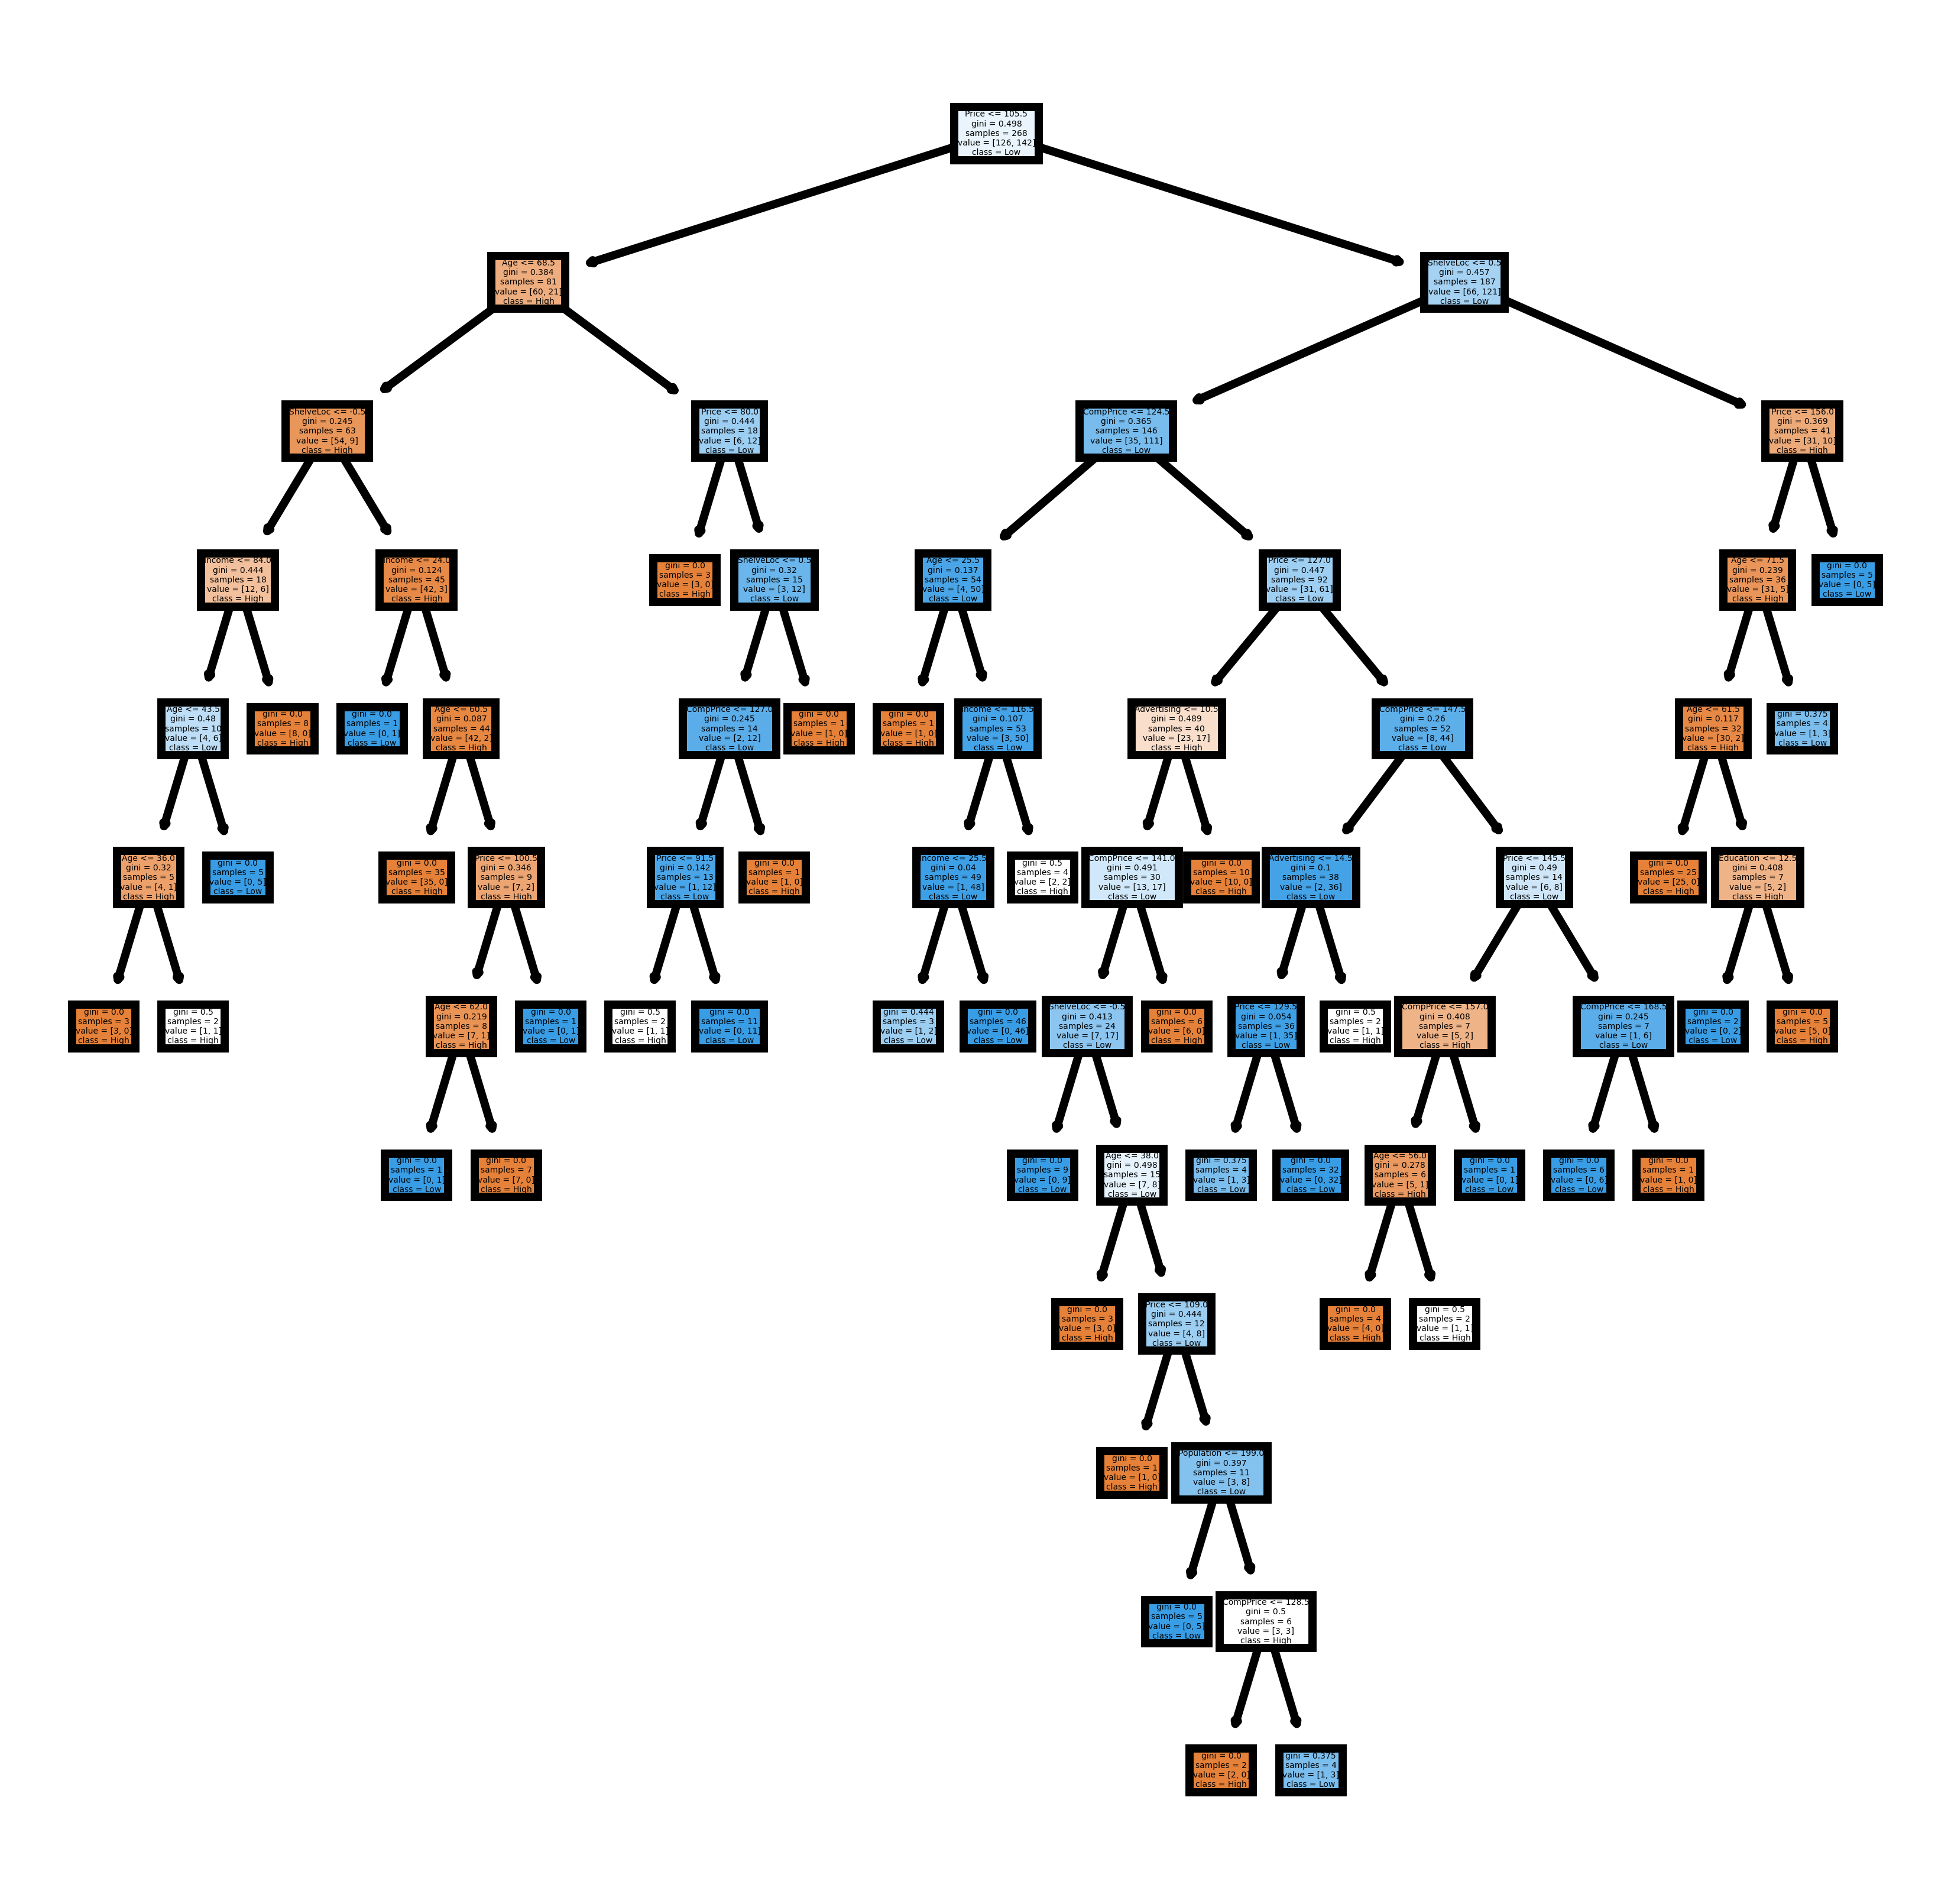

In [112]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['High','Low']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [44]:
#Grid Search CV

In [56]:
model1=DecisionTreeClassifier()
param={
    'criterion':['gini','entropy'],'max_depth':[6,8,10,12,15],'min_samples_split':[5,6,7,8,9]
}
gscv=GridSearchCV(model1,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_split': [5, 6, 7, 8, 9]})

In [58]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 8}

In [59]:
final_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_split= 8)

In [60]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=8)

In [61]:
print(classification_report(y_test,final_model.predict(x_test)))

              precision    recall  f1-score   support

        High       0.86      0.74      0.79        73
         Low       0.72      0.85      0.78        59

    accuracy                           0.79       132
   macro avg       0.79      0.79      0.79       132
weighted avg       0.80      0.79      0.79       132

